# K-Means Clustering ...

In [1]:
#  import all the libraries
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# load dataset
IRIS = datasets.load_iris()
DF = pd.DataFrame(IRIS.data, columns = IRIS.feature_names)
DF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## To find optimum no of clusters for k means classification

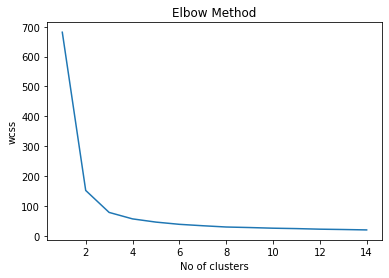

In [3]:
X = DF.iloc[:, [0, 1, 2, 3]].values


from sklearn.cluster import KMeans
wcss = []                            # within cluster sum of squares



for i in range(1, 15):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    
    
# plotting results
# elbow method

plt.plot(range(1, 15), wcss)
plt.title("Elbow Method")
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [4]:
# the optimum solution is where the elbow occurs so from this we choose no of clusters "3"

# apply kmeans on the dataset

kmeans = KMeans(n_clusters= 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_kmeans = kmeans.fit_predict(X)

print("created K-means classifier")
    
    

created K-means classifier


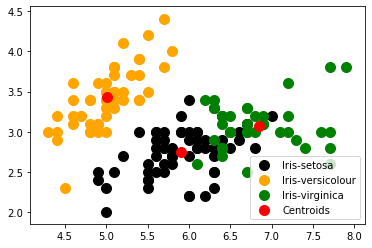

In [5]:
# visualization of clusters on 2 columns

plt.scatter(X[Y_kmeans == 0, 0], X[Y_kmeans == 0, 1], s = 100, c = 'black', label ='Iris-setosa')
plt.scatter(X[Y_kmeans == 1, 0], X[Y_kmeans == 1, 1], s = 100, c = 'orange', label ='Iris-versicolour')
plt.scatter(X[Y_kmeans == 2, 0], X[Y_kmeans == 2, 1], s = 100, c = 'green', label ='Iris-virginica')


# to plot centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.legend()